# Support Vector Machine (SVM)

In [1]:
'''Se importan las librerías y módulos que se van a utilizar'''

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
'''Se mandan a llamar los datos del dataframe y se los imprime'''
df = datasets.load_digits()   

'''características del dataset'''
print("Features:\n", df.feature_names)  

'''etiquetas del dataset'''
print("Labels:\n", df.target_names)  
    
'''forma del dataset'''
print("Shape:\n", df.data.shape) 

'''5 primeros registros'''   
print("Top five records:\n", df.data[0:5])  


Features:
 ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']
Labels:
 [0 1 2 3 4 5 6 7 8 9]
Shape:
 (1797, 64)
Top five records:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0.

### Función para el entrenamiento de "x" y "y" y la predicción del resultado

In [3]:
'''Se declara las variables del df que van a entrar en procesamiento'''
X_train, X_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.3, random_state=109)

'''Crea un clasificador svm con kernel linea'''
clf = svm.SVC(kernel='linear')   

'''Se procede a entrenar el modelo'''   
clf.fit(X_train, y_train)    

'''Se obtiene la predicción'''
y_pred = clf.predict(X_test) 


### Como resultado, se muestra el porcentaje de accuracy, precision y recall

In [4]:
'''Precisión del modelo: ¿con qué frecuencia es correcto el clasificador?'''
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))     

'''Precisión del modelo: ¿qué porcentaje de tuplas positivas son etiquetadas como tales?'''
print("Precision:", metrics.precision_score(y_test, y_pred,average='micro'))

'''Model Recall: ¿qué porcentaje de tuplas positivas son etiquetadas como tales?'''
print("Recall:", metrics.recall_score(y_test, y_pred,average='macro'))  


Accuracy: 0.9814814814814815
Precision: 0.9814814814814815
Recall: 0.9821235261345918


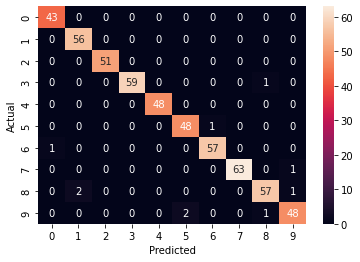

In [5]:
'''Proporción determinar de las 10 label de las cuales se hizo la predicción'''
data = {'y_Actual':y_test,'y_Predicted': y_pred}

'''Llamada al DataFrame'''
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

'''Ya predicho el modelo se lo grafica'''
sn.heatmap(confusion_matrix, annot=True)
plt.show()